# Dynamic measure mouse x-direction displacement and instanteous speed

## ** Set mouse sensistivity to low to match cursor and mouse physical movement

In [10]:
%matplotlib notebook

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
import win32api

In [12]:
def plt_dynamic(x, y, ax, colors=['b']):
    ax.set_xlim(x[0], x[-1])
    for color in colors:        
        ax.plot(x, y, color)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


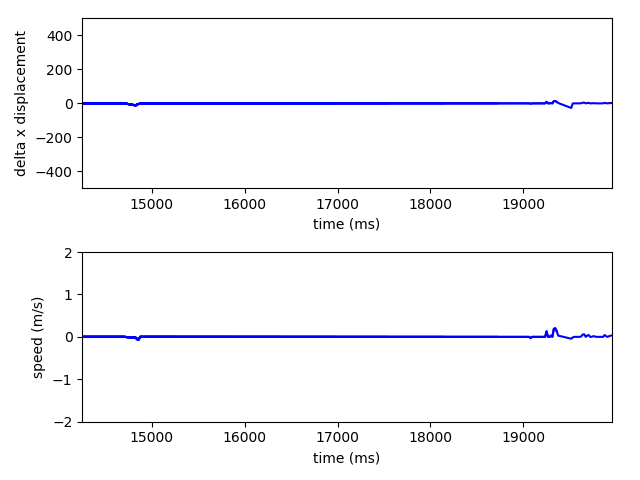

In [14]:
#fig,(ax, ax2) = plt.subplots(2, 1)
fig,(ax, ax2) = plt.subplots(2,1,sharex="none")
ax.set_xlabel('time (ms)') ; ax.set_ylabel('delta x displacement')
ax2.set_xlabel('time (ms)') ; ax2.set_ylabel('speed (m/s)')
ax.set_xlim(0,300) ; ax.set_ylim(-500,500)
ax2.set_xlim(0,300) ; ax2.set_ylim(-2,2)

xarray = [0]
velx = [0]
(wasx, wasy) = win32api.GetCursorPos()
n = [0]
duration = 0.0
was = time.time()
#factor = 28.5/1080             # cm/pixel for my ASUS monitor
factor = 17.4/768              # for Acer PC
plt.tight_layout()
count = 0

while count < 1000:
    time.sleep(0.0001)  
    now = time.time()   
    (x, y) = win32api.GetCursorPos()
    delta = (now - was)*1000  # milli-sec
    duration += delta
    n.append(duration)
    was = now
    xarray.append(x-wasx)
    velx.append((x-wasx)/delta*1000*factor/100)
    wasx = x
    
    if count % 30 == 0:        
        if len(n) >= 300:
            plt_dynamic(n[-300:-1], xarray[-300:-1], ax)
            plt_dynamic(n[-300:-1], velx[-300:-1], ax2)
        else:
            plt_dynamic(n, xarray, ax)
            plt_dynamic(n, velx, ax2)
    count += 1
#ax2.plot(xs, ys)
#ax2.set_xlabel('X') ; ax2.set_ylabel('Y')
#fig.canvas.draw()